In [102]:
# Import libraries.
import pandas as pd
import numpy as np
import scipy
import scipy.io.wavfile
from scipy import signal
import matplotlib.pyplot as plt
import math
import os
import datetime

In [75]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [207]:
pathFile =  "./Audios/ruido.wav"

In [289]:
# Load audio file.
(sample_rate, input_signal) = scipy.io.wavfile.read("./Audios/sonata.wav", mmap = True)
input_signal = input_signal[:,0]
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)   
audio_duration_minutes = time_array[-1] / 60
print("Sound ready! Duration in minutes: ", audio_duration_minutes)
input_signal_8000hz = [input_signal[i] for i in range(0, len(input_signal), sample_rate//8000)]


(sample_rate2, input_signal2) = scipy.io.wavfile.read("./Audios/ruido.wav", mmap = True)
input_signal2 = input_signal2[:,0]
time_array2 = np.arange(0, len(input_signal2)/sample_rate2, 1/sample_rate2)   
audio_duration_minutes2 = time_array2[-1] / 60
print("Sound ready! Duration in minutes: ", audio_duration_minutes2)
input_signal_8000hz2 = [input_signal2[i] for i in range(0, len(input_signal2), sample_rate2//8000)]
input_signal_8000hz2 = input_signal_8000hz2[0: len(input_signal_8000hz)]

Sound ready! Duration in minutes:  0.5339996527777778
Sound ready! Duration in minutes:  0.5461322916666667


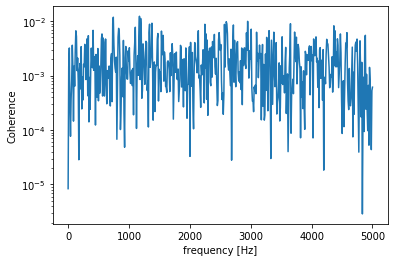

In [290]:
fs = 10e3
f, Cxy = scipy.signal.coherence(input_signal_8000hz, input_signal_8000hz2, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

In [291]:


len(input_signal_8000hz2[0: len(input_signal_8000hz)])

256320

### Reglas.

1. Cada audio dura 10 segundos.
2. Más tarde definimos el test de entrenamiento.
3. Primero, se carga el audio y se procesa.
4. El audio se estandariza pasandolo a 4000HZ.
5. Se calcula el espectograma del audio. 



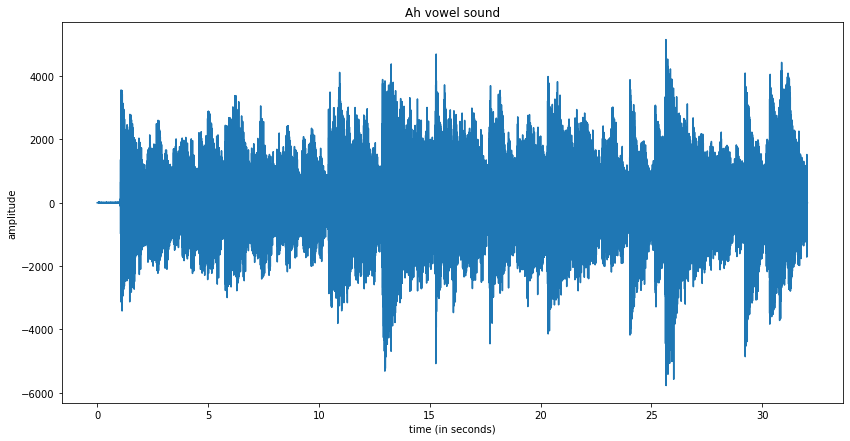

In [292]:
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array, input_signal)

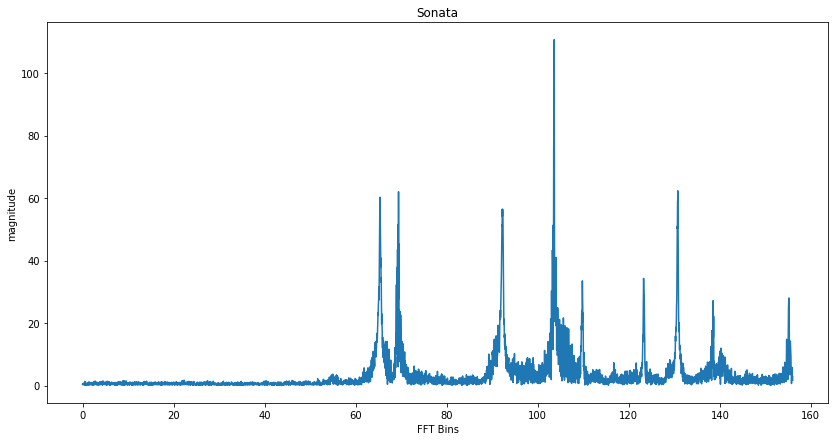

In [293]:
fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='Sonata', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])

F:\Users\JuanCepeda\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7725: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


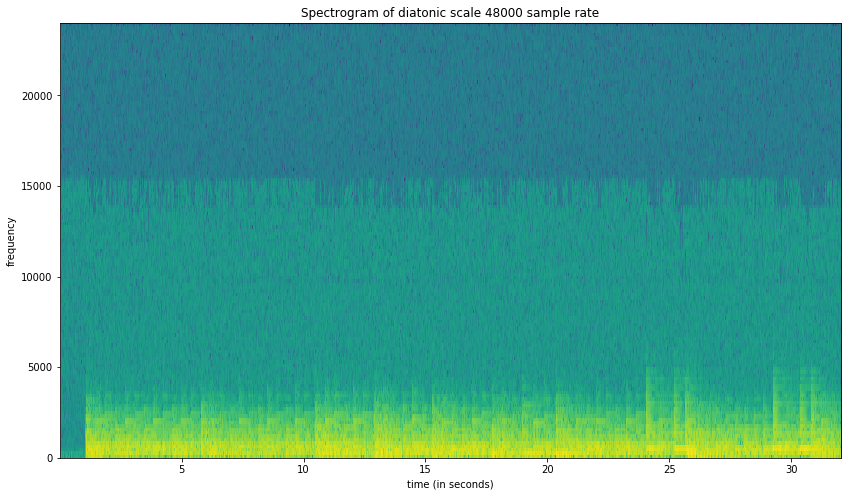

In [294]:
setup_graph(title='Spectrogram of diatonic scale ' + str(sample_rate) + " sample rate", x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(input_signal, Fs=sample_rate)

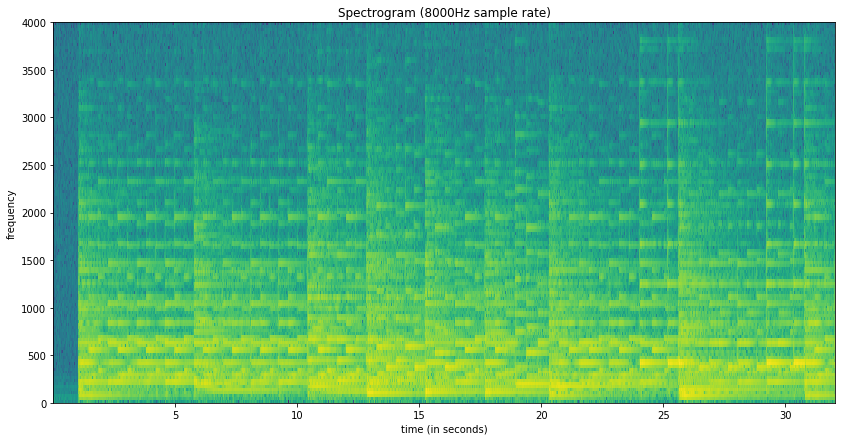

In [295]:
input_signal_8000hz = [input_signal[i] for i in range(0, len(doremi), sample_rate//8000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(input_signal_8000hz, Fs=8000)

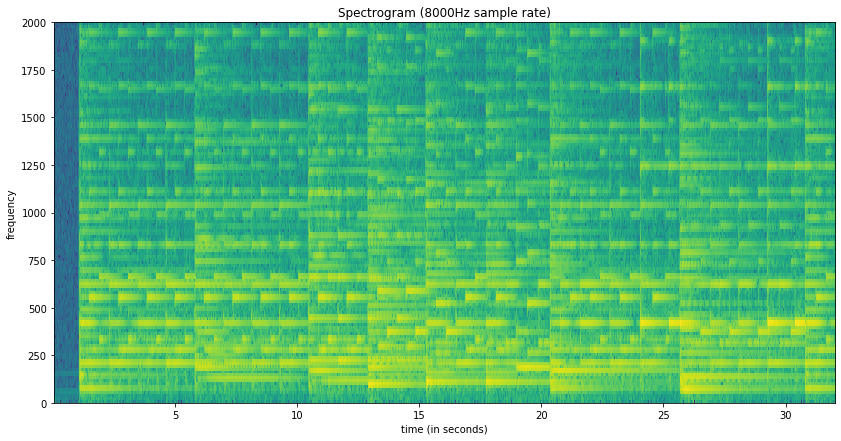

In [298]:
input_signal_8000hz = [input_signal[i] for i in range(0, len(doremi), sample_rate//4000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(input_signal_8000hz, Fs=4000)

In [ ]:
input_signal_8000hz = [input_signal[i] for i in range(0, len(doremi), sample_rate//1000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(input_signal_8000hz, Fs=1000)

In [283]:
f, t, Sxx = scipy.signal.spectrogram(input_signal)

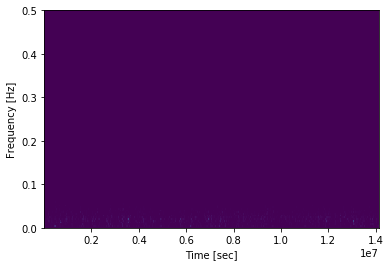

In [284]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [281]:
signal = scipy.signal.spectrogram(input_signal)
signal

(array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.07421875,
        0.078125  , 0.08203125, 0.0859375 , 0.08984375, 0.09375   ,
        0.09765625, 0.1015625 , 0.10546875, 0.109375  , 0.11328125,
        0.1171875 , 0.12109375, 0.125     , 0.12890625, 0.1328125 ,
        0.13671875, 0.140625  , 0.14453125, 0.1484375 , 0.15234375,
        0.15625   , 0.16015625, 0.1640625 , 0.16796875, 0.171875  ,
        0.17578125, 0.1796875 , 0.18359375, 0.1875    , 0.19140625,
        0.1953125 , 0.19921875, 0.203125  , 0.20703125, 0.2109375 ,
        0.21484375, 0.21875   , 0.22265625, 0.2265625 , 0.23046875,
        0.234375  , 0.23828125, 0.2421875 , 0.24609375, 0.25      ,
        0.25390625, 0.2578125 , 0.26171875, 0.265625  , 0.26953125,
        0.2734375 , 0.27734375, 0.28125   , 0.28

In [185]:
def stft(input_data, sample_rate, window_size, hop_size):
    window = scipy.hamming(window_size)
    output = scipy.array([scipy.fft(window*input_data[i:i+window_size]) 
                         for i in range(0, len(input_data)-window_size, hop_size)])
    return output

def istft(input_data, sample_rate, window_size, hop_size, total_time):
    output = scipy.zeros(int(total_time*sample_rate))
    for n,i in enumerate(range(0, len(output)-window_size, hop_size)):
        output[i:i+window_size] += scipy.real(scipy.ifft(input_data[n]))
    return output

def low_pass_filter(max_freq, window_size, sample_rate):
    fft_bin_width = sample_rate / window_size
    max_freq_bin = max_freq / fft_bin_width
    filter_block = np.ones(window_size)
    
    
    filter_block[int(max_freq_bin): int(window_size-max_freq_bin)] = 0
    return filter_block

def high_pass_filter(min_freq, window_size, sample_rate):
    return np.ones(window_size) - low_pass_filter(min_freq, window_size, sample_rate)

def write_audio_file(filename, filedata, sample_rate):
    scipy.io.wavfile.write(filename, sample_rate, filedata)

In [186]:
def filter_audio(input_signal, sample_rate, filter_window, window_size=256):
    # Setting parameters
    hop_size = window_size // 2
    total_time = len(input_signal) / sample_rate
    
    # Do actual filtering
    stft_output = stft(input_signal, sample_rate, window_size, hop_size)
    filtered_result = [original * filter_window for original in stft_output]
    resynth = istft(filtered_result, sample_rate, window_size, hop_size, total_time)
    
    return resynth

In [187]:
infile = "./Audios/sonata.wav"
outfile = "./Audios/high_pass_out.wav"
window_size = 256

# Input
(sample_rate, input_signal) = scipy.io.wavfile.read(infile)
input_signal = input_signal[:,0]

# Create filter window
filter_window = high_pass_filter(2500, window_size, sample_rate)

# Run filter
resynth = filter_audio(input_signal, sample_rate, filter_window, window_size)

# Output
write_audio_file(outfile, resynth, sample_rate)